### MEGALINE TELECOM RESEARCH

This project is to analyze clients' behavior and determine which prepaid plan is more profitable for the company. The goal of this research is for the commercial department to know which of the plans is more profitable in order to adjust the advertising budget.

### Table of Contents
* <a href="#Step 1">Opening the Data ></a><br>
    * <a href="#calldata">Call Data File</a><br>
    * <a href="#internetdata">Internet Data File</a><br>
    * <a href="#messagesdata">Messages Data File</a><br>
    * <a href="#plansdata">Plans Data File</a><br>
    * <a href="#usersdata">Users Data File</a><br>
        * <a href="#step1_conclusion">Conclusion</a><br>
* <a href="#Step 2">Prepare the Data</a><br>
    * <a href="#calldataprep">Preparing call data</a><br>
    * <a href="#internetdataprep">Preparing internet data</a><br>
    * <a href="#messagesdataprep">Preparing messeges data</a><br>
    * <a href="#plansdataprep">Preparing Plans data</a><br>
    * <a href="#usersdataprep">Preparing Users data</a><br>
    * <a href="#smspermonth">Messages consumed per Month</a><br>
    * <a href="#callpermonth">Call minutes consumed per Month</a><br>
    * <a href="#Gbpermonth">Internet consumed per Month</a><br>
    * <a href="#monthlyCharges">Adding the Monthly Charges</a><br>
        * <a href="#step2_conclusion">Conclusion</a><br>
* <a href="#Step 3">Analyze The Data</a><br>
    * <a href="#surfusers">separating the Surf plan subscribers</a><br>
    * <a href="#ultimateusers">separating the Ultimate plan subscribers</a><br>
    * <a href="#sms">Values of Text volume</a><br>
    * <a href="#call">Values of Call volume</a><br>
    * <a href="#internet">Values of internet volume</a><br>
    * <a href="#volumereq">Monthly volume requirement</a><br>
        * <a href="#Step3conclusion">Conclusion</a><br>
* <a href="#Step 4">Test the hypotheses</a><br>
    * <a href="#hyphotesis1">Testing users plan hyphotesis</a><br>
        * <a href="#step4conclusion">Conclusion</a><br>
* <a href="#Step 5">Overall conclusion</a><br>       

In [1]:
from scipy import stats as st
import numpy as np
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
call_data = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint4/megaline_calls (2).csv')
internet_data = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint4/megaline_internet (2).csv')
messages_data = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint4/megaline_messages (1).csv')
plans_data = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint4/megaline_plans (1).csv')
users_data = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint4/megaline_users (1).csv')

<p><a name="Step 1"></a></p>

### Step 1. Open the data file and study the general information

<p><a name="calldata"></a></p>

In [3]:
# Opening the call data file
print(call_data.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [4]:
print(call_data.tail())

              id  user_id   call_date  duration
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86


In [5]:
call_data.shape

(137735, 4)

In [6]:
call_data.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [7]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


<p><a name="internetdata"></a></p>

In [8]:
# opening internet data file
print(internet_data.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [9]:
print(internet_data.tail())

              id  user_id session_date  mb_used
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31


In [10]:
internet_data.shape

(104825, 4)

In [11]:
internet_data.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [12]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


<p><a name="messagesdata"></a></p>

In [13]:
# Opening the messages_data file

print (messages_data.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [14]:
print(messages_data.tail())

             id  user_id message_date
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23


In [15]:
messages_data.shape

(76051, 3)

In [16]:
messages_data.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [17]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<p><a name="plansdata"></a></p>

In [18]:
#Opening the plans_data file
print(plans_data)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [19]:
plans_data.shape

(2, 8)

In [20]:
plans_data.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [21]:
plans_data.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [22]:
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


<p><a name="usersdata"></a></p>

In [23]:
# Opening the users_data file
print(users_data.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [24]:
print(users_data.tail())

     user_id first_name   last_name  age  \
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
495  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-09-04      surf   
496               New Orleans-Metairie, LA MSA  2018-02-20      surf   
497     Los Angeles-Long Beach-Anaheim, CA MSA  2018-12-10  ultimate   
498  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-02-04      surf   
499          Orlando-Kissimmee-Sanford, FL MSA  2018-05-06      surf   

    churn_date  
495        NaN  
496        NaN  
497        NaN  
498        NaN  
499        NaN  


In [25]:
users_data.shape

(500, 8)

In [26]:
users_data.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [27]:
users_data.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [28]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<p><a name="step1_conclusion"></a></p>

### Conclusion

We have 5 Datasets, the call data which has 137735 rows and 4 columns, the internet data which has 104825 rows and 4 columns, messages data which has 76051 rows and 3 columns, plans data with 2 rows and 8 columns and users data with 500 rows and  8 columns.There are several data types which are in wrong formats like the dates which are all in object instead of datetime64, and some real numbers which needs to be converted to int. there are no duplicates however there are NaN values which need to be processed.

<p><a name="Step 2"></a></p>

### Step 2. Prepare the data

<p><a name="calldataprep"></a></p>

In [29]:
#Checking for Nan values in the call_data file.
print (call_data.isnull().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [30]:
# #I will convert the call_date column by converting it from a string type to datetime64.
call_data['call_date']= pd.to_datetime(call_data['call_date'], format = '%Y-%m-%dT%H:%M')

In [31]:
# then i will call the pivot table to group the columns  user_id and call date to duration 
#to know the numbers of calls made per user _id in a month
call_data_grouped=pd.pivot_table(call_data,index=["user_id"],values=["duration"], aggfunc=['count','sum'])
call_data_grouped.columns = ['count', 'total call']

In [32]:
# I will round off the total call to whole number in order to have a better calculation of charges
#call_data_grouped['total call'] = call_data_grouped['total call'].apply(np.ceil) 

In [33]:
print(call_data_grouped)

         count  total call
user_id                   
1000        16      116.83
1001       261     1640.46
1002       113      777.13
1003       149     1041.00
1004       370     2618.95
...        ...         ...
1495       253     1666.41
1496       195     1376.21
1497        54      276.53
1498       451     3029.97
1499       204     1450.31

[481 rows x 2 columns]


We will be able to determine the number of  calls made and total of minutes used of every user by calling the pivot table.The 0.0 minutes calls will not affect the total call per month, therefore im leaving it as it is and will not drop it. Zero duration calls happen When a systems attempts a call but fails to connect, that call is usually logged as a call with zero duration. These failures may be due to a number of causes, such as an incorrectly dialed number, or that the called user was busy or did not answer.

<p><a name="internetdataprep"></a></p>

In [34]:
#Preparing the internet data file
print (internet_data.isnull().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


There is no NaN values, so what i have to do is convert the data types and mb_used to gb_used

In [35]:
#I will convert the session date column  from a string type to datetime64.
internet_data['session_date']= pd.to_datetime(internet_data['session_date'], format = '%Y-%m-%dT%H:%M')

In [36]:
# i will caculate megabytes to gigabytes and make a column for it.
internet_data['Gb_used']= internet_data['mb_used'] / 1024

In [37]:
# to get a better view of the data i will make a slice of the 3 columns i will be needing to get
# the information of internet usages per month of every user.
internet_data1 = internet_data[['user_id', 'Gb_used']]

In [38]:
#by calling the pivot i will have a better look on the number of times and total usage of interenet per month of every user.
internet_data_grouped= pd.pivot_table(internet_data1,index=["user_id"],values=['Gb_used'], aggfunc=['sum'])
internet_data_grouped.columns = ['Gb consumed']

In [39]:
# I will will join the filtered call data and internet usage data per user.
call_internet= call_data_grouped.join(internet_data_grouped)

In [40]:
print(call_internet)

         count  total call  Gb consumed
user_id                                
1000        16      116.83     1.856904
1001       261     1640.46    78.552676
1002       113      777.13    39.348955
1003       149     1041.00    26.410293
1004       370     2618.95   152.688291
...        ...         ...          ...
1495       253     1666.41    96.573203
1496       195     1376.21    62.762344
1497        54      276.53    10.846240
1498       451     3029.97   222.192510
1499       204     1450.31    69.677959

[481 rows x 3 columns]


By calling the pivot table it makes the data easier to read and we will be able to get the information we need, as to the total GB every user consumed per month.I will also use the join function to add the call data for every user.

<p><a name="messagesdataprep"></a></p>

In [41]:
#Cheking for Nan values in messages_data-
print (messages_data.isnull().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [42]:
#changing the data type of id column from object to int by calling the astype.
messages_data = messages_data.astype({"id": int})

In [43]:
#Changing the message_date column from object to datetime64.
messages_data['message_date']= pd.to_datetime(messages_data['message_date'], format = '%Y-%m-%dT%H:%M')

In [44]:
# i will add the month column for me to be able to calculate the usage per month.
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month 

In [45]:
#by calling the pivot i will have a better look on the number messages per month of every user.
messages_data_grouped= pd.pivot_table(messages_data,index=["user_id"],values=['id'], aggfunc=['count'])
messages_data_grouped.columns = ['messages count']

In [46]:
call_internet_messages = call_internet.join(messages_data_grouped)

In [47]:
print(call_internet_messages)

         count  total call  Gb consumed  messages count
user_id                                                
1000        16      116.83     1.856904            11.0
1001       261     1640.46    78.552676           207.0
1002       113      777.13    39.348955            88.0
1003       149     1041.00    26.410293            50.0
1004       370     2618.95   152.688291           177.0
...        ...         ...          ...             ...
1495       253     1666.41    96.573203             NaN
1496       195     1376.21    62.762344            65.0
1497        54      276.53    10.846240            50.0
1498       451     3029.97   222.192510             NaN
1499       204     1450.31    69.677959             NaN

[481 rows x 4 columns]


with the result of pivot table we can see how many messeges the user sent every month.The NaN values indicates the user did not utilized the messages and internet data in the plan. and so therefore i will replace the NaN values with 0.

In [48]:
print (call_internet_messages.isnull().sum())

count              0
total call         0
Gb consumed        1
messages count    87
dtype: int64


In [49]:
# fill the Nan values with 0.0
call_internet_messages = call_internet_messages.fillna(value= 0.0)

For the NaN values of messages count  and Gb consumed the possible reason could be that Pandas automatically converts the None to a NaN value.which could mean that the user has not consumed the messages and internet data yet when the data was taken. I am replacing it with 0 value so that the computation later with usage of the products will be more accurate compared to imputing it with meadian and mean.

In [50]:
#converting the columns from real numbers to int.
call_internet_messages = call_internet_messages.astype({"messages count": int })

In [51]:
print(call_internet_messages)

         count  total call  Gb consumed  messages count
user_id                                                
1000        16      116.83     1.856904              11
1001       261     1640.46    78.552676             207
1002       113      777.13    39.348955              88
1003       149     1041.00    26.410293              50
1004       370     2618.95   152.688291             177
...        ...         ...          ...             ...
1495       253     1666.41    96.573203               0
1496       195     1376.21    62.762344              65
1497        54      276.53    10.846240              50
1498       451     3029.97   222.192510               0
1499       204     1450.31    69.677959               0

[481 rows x 4 columns]


In [52]:
print (call_internet_messages.isnull().sum())

count             0
total call        0
Gb consumed       0
messages count    0
dtype: int64


There is no longer NaN values and all are converted to the desired data type.

<p><a name="plansdataprep"></a></p>

In [53]:
print (plans_data.isnull().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


Checking for NaN values in the data set

In [54]:
plans_data['Gb_per_month_included']= plans_data['mb_per_month_included'] / 1000

In [55]:
print(plans_data)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   Gb_per_month_included  
0                  15.36  
1                  30.72  


<p><a name="usersdataprep"></a></p>

In [56]:
print (users_data.isnull().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In this data where churn date if the value is missing, the calling plan was being used when this data was retrieved.the date the user stopped using the service. Therefore, i have to replace the missing values  by the column of reg date.

In [57]:
#changing Nan values of churn data to Nat.
users_data['churn_date'] = users_data['churn_date'].fillna(users_data['reg_date'])

In [58]:
#Changing the reg_date column from object to datetime64.
users_data['reg_date']= pd.to_datetime(users_data['reg_date'], format = '%Y-%m-%dT%H:%M')

In [59]:
#determining the reg_month and adding it to the table
users_data['reg_month'] = pd.DatetimeIndex(users_data['reg_date']).month 

In [60]:
#Changing the churn_date column from object to datetime64.
users_data['churn_date']= pd.to_datetime(users_data['churn_date'], format = '%Y-%m-%dT%H:%M')

In [61]:
#determining the churn month column and adding it to the table
users_data['churn_month'] =pd.DatetimeIndex(users_data['churn_date']).month 

In [62]:
#Getting the total number of months subscription of each user, i will add 1 so i dont get the value of zero.
users_data['total_month']=  users_data['churn_month'] - users_data['reg_month'] + 1

In [63]:
print(users_data.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  reg_month  churn_month  total_month  
0 2018-12-24  ultimate 2018-12-24         12           12            1  
1 2018-08-13      surf 2018-08-13          8            8            1  
2 2018-10-21      surf 2018-10-21         10           10            1  
3 2018-01-28      surf 2018-01-28          1            1            1  
4 2018-05-23      surf 2018-05-23          5            5            1  


In [64]:
#Replacing 'plan' column to numeric value assignments in Plan_data file
plan = users_data['plan'].replace(to_replace = ['ultimate', 'surf'], value = ['1', '0' ])

In [65]:
 users_data['plan'] = plan

In [66]:
 users_data =  users_data.astype({'plan': int})

In [67]:
#slicing the users data to 3 particular columns
users_info = users_data[['user_id','plan' , 'total_month']]

In [68]:
print(users_info.head())

   user_id  plan  total_month
0     1000     1            1
1     1001     0            1
2     1002     0            1
3     1003     0            1
4     1004     0            1


In [69]:
def plan_messages(plan):
    if plan == 1:
        return 1000
    if plan == 0:
        return 50

In [70]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [71]:
users_info['plan_messages'] =users_info['plan'].apply(plan_messages)

In [72]:
def call_plan(plan):
    if plan == 1:
        return 3000
    if plan == 0:
        return 500

In [73]:
users_info['call_plan'] =users_info['plan'].apply(call_plan )

In [74]:
def internet_plan(plan):
    if plan == 1:
        return 30.72
    if plan == 0:
        return 15.36

In [75]:
users_info['internet_plan'] = users_info['plan'].apply(internet_plan)

In [76]:
#Merge the filtered users data and the dataset for call, internet and messeges datas.
users_info_grouped = pd.merge(users_info, call_internet_messages, on='user_id')


In [77]:
print(users_info_grouped.head())

   user_id  plan  total_month  plan_messages  call_plan  internet_plan  count  \
0     1000     1            1           1000       3000          30.72     16   
1     1001     0            1             50        500          15.36    261   
2     1002     0            1             50        500          15.36    113   
3     1003     0            1             50        500          15.36    149   
4     1004     0            1             50        500          15.36    370   

   total call  Gb consumed  messages count  
0      116.83     1.856904              11  
1     1640.46    78.552676             207  
2      777.13    39.348955              88  
3     1041.00    26.410293              50  
4     2618.95   152.688291             177  


<p><a name="smspermonth"></a></p>

In [78]:
#Calculating the monthly uses of messages and subtracting it according to users plan
users_info_grouped['sms_per_month'] = (users_info_grouped['messages count'] 
                                            /  users_info_grouped['total_month']) - users_info_grouped['plan_messages']

<p><a name="callpermonth"></a></p>

In [79]:
#Calculating the total calls per month and subtractiong it according to users plan

users_info_grouped['call_per_month'] = (users_info_grouped['total call'] 
                                            /  users_info_grouped['total_month']) - users_info_grouped['call_plan']

In [80]:
# I am rounding off the call per month to calculate easier the usage.
users_info_grouped['call_per_month'] = users_info_grouped['call_per_month'].apply(np.ceil) 

<p><a name="Gbpermonth"></a></p>

In [81]:
#Calculating the total internet used per month and subtractiong it according to users plan

users_info_grouped['Gb_per_month'] = (users_info_grouped['Gb consumed'] 
                                            /  users_info_grouped['total_month']) - users_info_grouped['internet_plan']

In [82]:
# I am rounding off the internet cunsumed per month to calculate easier the usage.
users_info_grouped['Gb_per_month'] = users_info_grouped['Gb_per_month'].apply(np.ceil) 

In [83]:
#to be able to ha a proper computation of charges i will replaces negative numbers of usage to 0.
users_info_grouped[users_info_grouped < 0] = 0

<p><a name="monthlyCharges"></a></p>

In [84]:
# Add the monthly Plan charge for call
def plan_charge(plan):
    if plan == 1 :
        return 70
    if plan == 0:
        return 20

In [85]:
users_info_grouped['plan_charge'] =users_info_grouped['plan'].apply(plan_charge)

In [86]:
#Add charges for messages sent that exceeds the plan
def sms_charge(plan):
    if plan == 1:
        return 0.01
    if plan == 0:
        return 0.03

In [87]:
users_info_grouped['sms_charge'] =users_info_grouped['plan'].apply(sms_charge)

In [88]:
#calculating the total charges of exceed messages according to plan charges and adding it to the table

users_info_grouped['sms_charge'] = users_info_grouped['sms_per_month'] * users_info_grouped['sms_charge']

In [89]:
#Add charges for calls made that exceeds the plan
def call_charge(plan):
    if plan == 1:
        return 0.01
    if plan == 0:
        return 0.03

In [90]:
users_info_grouped['call_charge'] =users_info_grouped['plan'].apply(call_charge)

In [91]:
#calculating the  charges of exceed calls according to plan charges and adding it to the table
users_info_grouped['call_charge'] = users_info_grouped['call_per_month']* users_info_grouped['call_charge']

In [92]:
#Add charges for internet used that exceeds the plan
def internet_charge(plan):
    if plan == 1:
        return 7
    if plan == 0:
        return 10

In [93]:
users_info_grouped['internet_charge'] =users_info_grouped['plan'].apply(internet_charge)

In [94]:
#calculating the  charges of exceed internet used according to plan charges and adding it to the table
users_info_grouped['internet_charge'] = users_info_grouped['Gb_per_month'] * users_info_grouped['internet_charge']

In [95]:
#Calculating the total monthly charge of each user according to plan and  adding it to the table
users_info_grouped['total_montly_charge'] = users_info_grouped['plan_charge'] + users_info_grouped['sms_charge'] + users_info_grouped['call_charge'] + users_info_grouped['internet_charge']                                                  

In [96]:
print(users_info_grouped.head())

   user_id  plan  total_month  plan_messages  call_plan  internet_plan  count  \
0     1000     1            1           1000       3000          30.72     16   
1     1001     0            1             50        500          15.36    261   
2     1002     0            1             50        500          15.36    113   
3     1003     0            1             50        500          15.36    149   
4     1004     0            1             50        500          15.36    370   

   total call  Gb consumed  messages count  sms_per_month  call_per_month  \
0      116.83     1.856904              11            0.0             0.0   
1     1640.46    78.552676             207          157.0          1141.0   
2      777.13    39.348955              88           38.0           278.0   
3     1041.00    26.410293              50            0.0           541.0   
4     2618.95   152.688291             177          127.0          2119.0   

   Gb_per_month  plan_charge  sms_charge  call_cha

In [97]:
users_monthly_charge = pd.pivot_table(users_data,index=["last_name"],values=['user_id'])
users_monthly_charge

,user_id
last_name,
Acevedo,1083.0
Adkins,1170.0
Aguilar,1260.0
Albert,1121.0
Allen,1067.0
...,...
Wynn,1493.0
Yang,1115.0
Yates,1116.0


In [98]:
users_data_final = pd.merge(users_data, users_info_grouped, on='user_id')

In [99]:
users_data_final['revenue'] = users_data_final['total_montly_charge'] - users_data_final['plan_charge']

In [100]:
print(users_data_final.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date  plan_x churn_date  reg_month  churn_month  ...  messages count  \
0 2018-12-24       1 2018-12-24         12           12  ...              11   
1 2018-08-13       0 2018-08-13          8            8  ...             207   
2 2018-10-21       0 2018-10-21         10           10  ...              88   
3 2018-01-28       0 2018-01-28          1            1  ...              50   
4 2018-05-23       0 2018-05-23          5            5  ...             177   

   sms_per_month  call_per_month  Gb_p

In [101]:
users_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 480
Data columns (total 29 columns):
user_id                481 non-null int64
first_name             481 non-null object
last_name              481 non-null object
age                    481 non-null int64
city                   481 non-null object
reg_date               481 non-null datetime64[ns]
plan_x                 481 non-null int64
churn_date             481 non-null datetime64[ns]
reg_month              481 non-null int64
churn_month            481 non-null int64
total_month_x          481 non-null int64
plan_y                 481 non-null int64
total_month_y          481 non-null int64
plan_messages          481 non-null int64
call_plan              481 non-null int64
internet_plan          481 non-null float64
count                  481 non-null int64
total call             481 non-null float64
Gb consumed            481 non-null float64
messages count         481 non-null int64
sms_per_month          481 n

The call charges, sms charges and internet charges including the total monthy charge and the revenue of user has been calculated and added in the table.

<p><a name="step2_conclusion"></a></p>

### Conclusion

The Call, Messeges, Internet, plan and users datasets has been sliced, filtered, and merged in order for us to calculate and add the necessary column to determine the charges according to plan of the user.

<p><a name="Step 3"></a></p>

### Step 3. Analyze the data

<p><a name="surfusers"></a></p>

In [102]:
# slice the users according to plan.
surf = users_data_final['plan_x'] == 0 

In [103]:
surf_plan = users_data_final[surf]

In [104]:
print(surf_plan.head())

   user_id first_name  last_name  age                                  city  \
1     1001     Mickey  Wilkerson   28       Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36  Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                         Tulsa, OK MSA   
4     1004    Leonila   Thompson   40       Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31   Dallas-Fort Worth-Arlington, TX MSA   

    reg_date  plan_x churn_date  reg_month  churn_month  ...  messages count  \
1 2018-08-13       0 2018-08-13          8            8  ...             207   
2 2018-10-21       0 2018-10-21         10           10  ...              88   
3 2018-01-28       0 2018-01-28          1            1  ...              50   
4 2018-05-23       0 2018-05-23          5            5  ...             177   
5 2018-11-29       0 2018-11-29         11           11  ...              11   

   sms_per_month  call_per_month  Gb_per_mon

the printed users above are the one registered in surf plan

<p><a name="ultimateusers"></a></p>

In [105]:
# slice the users according to Ultimate plan.
ultimate = users_data_final['plan_x'] == 1 

In [106]:
ultimate_plan = users_data_final[ultimate]

In [107]:
print(ultimate_plan.head())

    user_id first_name last_name  age                                    city  \
0      1000   Anamaria     Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
6      1006     Jesusa  Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
8      1008      Emely   Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
11     1011     Halina     Henry   73                Cleveland-Elyria, OH MSA   
13     1013    Nicolas    Snider   50                       Knoxville, TN MSA   

     reg_date  plan_x churn_date  reg_month  churn_month  ...  messages count  \
0  2018-12-24       1 2018-12-24         12           12  ...              11   
6  2018-11-27       1 2018-12-18         11           12  ...             154   
8  2018-08-03       1 2018-08-03          8            8  ...              84   
11 2018-01-18       1 2018-01-18          1            1  ...             371   
13 2018-12-01       1 2018-12-01         12           12  ...              16   

    sms_per_month  call_pe

the printed users above are the one registered in Ultimate plan

<p><a name="sms"></a></p>

In [108]:
# determining the mean value of text per user plan
surf_mean= surf_plan['sms_per_month'].mean()
print('The mean volume of text for surf users:' "{:.5}". format(surf_mean))
ultimate_mean= ultimate_plan['sms_per_month'].mean()
print('The mean volume of text for ultimate users:' "{:.5}". format(ultimate_mean))

The mean volume of text for surf users:104.16
The mean volume of text for ultimate users:1.8581


In [109]:
# determining the standard deviation value of text per user plan
surf_std= surf_plan['sms_per_month'].std()
print('The standard deviation value of text volume for surf users:' "{:.5}". format(surf_std))
ultimate_std= ultimate_plan['sms_per_month'].std()
print('The standard deviation value of text volume for ultimate users:' "{:.5}". format(ultimate_std))

The standard deviation value of text volume for surf users:173.58
The standard deviation value of text volume for ultimate users:23.133


In [110]:
# determining the dispersion value of text per user plan using variance
surf_var= np.var(surf_plan['sms_per_month'])
print('The derspersion value of text volume for surf users:' "{:.7}". format(surf_var))
ultimate_var= np.var(ultimate_plan['sms_per_month'])
print('The despersion value of text volume for ultimate users:' "{:.5}". format(ultimate_var))

The derspersion value of text volume for surf users:30037.26
The despersion value of text volume for ultimate users:531.67


S_max:  1183.0
S_min: 0.0
U_max:  288.0
U_min: 0.0


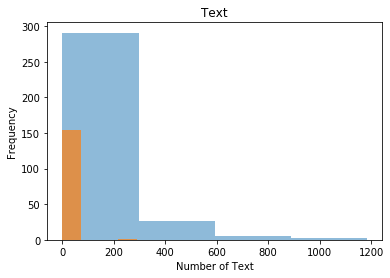

In [111]:
surf_plan['sms_per_month'].plot.hist(bins=4, alpha=0.5);
print("S_max: ", surf_plan['sms_per_month'].max())
print("S_min:", surf_plan['sms_per_month'].min())
ultimate_plan['sms_per_month'].plot.hist(bins=4, alpha=0.7);
print("U_max: ", ultimate_plan['sms_per_month'].max())
print("U_min:", ultimate_plan['sms_per_month'].min())
plt.title('Text')
plt.xlabel('Number of Text');

in the text volume, we can see in the graph the texting behavior of the  users of surf plan and ultimate plan. the surf plan user text more often and since thex have limited text inclusion they tend to pay more ultimate plan.

The lower limit: 0.0
The upper limit: 337.5


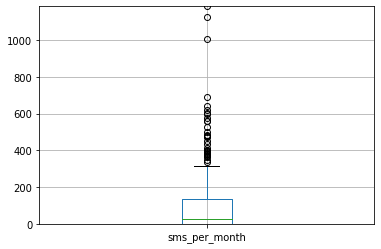

In [112]:
## surf_plan.boxplot('sms_per_month')
surf_plan.boxplot('sms_per_month')
plt.ylim(0, 1183)

Q1 = surf_plan['sms_per_month'].quantile(0.25)
Q3 = surf_plan['sms_per_month'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('The upper limit:', Q3+1.5*IQR)

As we can see here at the box plot there are outliers on surf plan sms usage. in order to analyze better we will we will filter the column by removing the outliers.The lower whisker starts at 0, the minimum value, and the upper limit one ends at about 337.5, which is 1.5 IQR above the third quartile. That is the approximate border of the "typical" range. Everything beyond it can usually be considered an outlier.

In [113]:
#filter the surf plan data of the data by removing the outliers in the sms usage column.

filtered_surf =  surf_plan[surf_plan ['sms_per_month'] < 337.5]

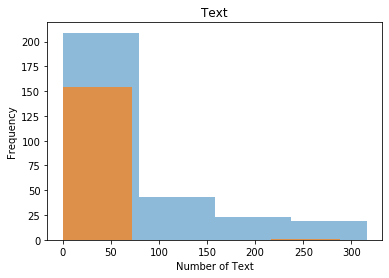

In [114]:
# making histogram of the filtered 'sms_usage ' column

filtered_surf['sms_per_month'].plot.hist(bins=4, alpha=0.5);
ultimate_plan['sms_per_month'].plot.hist(bins=4, alpha=0.7);
plt.title('Text')
plt.xlabel('Number of Text');


compared to the previous hist, we can now cleary see how the consuption of text messeges of users from both plan.The blue is the hist from the surf plan while the orange is for the ultimate.

<p><a name="call"></a></p>

In [115]:
# determining the mean value of call per user plan
surf_mean= surf_plan['call_per_month'].mean()
print('The mean volume of call for surf users:'"{:.5}". format(surf_mean))
ultimate_mean= ultimate_plan['call_per_month'].mean()
print('The mean volume of call for ultimate users:'"{:.5}". format(ultimate_mean))

The mean volume of call for surf users:1403.3
The mean volume of call for ultimate users:276.79


In [116]:
# determining the standard deviation value of call per user plan
surf_std= surf_plan['call_per_month'].std()
print('The standard deviation value of call volume for surf users:'"{:.5}". format(surf_std))
ultimate_std= ultimate_plan['call_per_month'].std()
print('The standard deviation value of call volume for ultimate users:'"{:.5}". format(ultimate_std))

The standard deviation value of call volume for surf users:1588.1
The standard deviation value of call volume for ultimate users:813.47


The standard deviation is the average amount of variability in our data set. It tells us, on average, how far each score lies from the mean.In normal distributions, a high standard deviation means that values are generally far from the mean, while a low standard deviation indicates that values are clustered close to the mean. in this case the surf plan users has a higher standard deviation meaning the data spread is wider compared to ulitimate users.

In [117]:
# determining the dispersion value of call per user plan using variance
surf_var= np.var(surf_plan['call_per_month'])
print('The derspersion value of call volume for surf users:'"{:.8}". format(surf_var))
ultimate_var= np.var(ultimate_plan['call_per_month'])
print('The despersion value of call volume for ultimate users:'"{:.8}". format(ultimate_var))

The derspersion value of call volume for surf users:2514215.6
The despersion value of call volume for ultimate users:657460.43


A large variance indicates that numbers in the set are far from the mean and far from each other. A small variance, on the other hand, indicates the opposite.in this case of the variance despersion of call consumption from both plan users. we can see a very high number of despersion,  this means to better understand the data we have to evaluate and filter it for possible outliers.

S_max:  8451.0
S_min: 0.0
U_max:  5025.0
U_min: 0.0


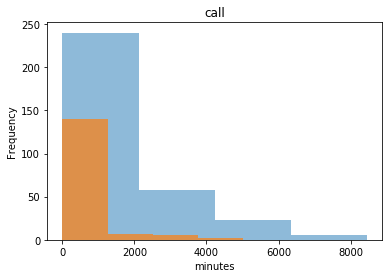

In [118]:
surf_plan['call_per_month'].plot.hist(bins=4, alpha=0.5);
print("S_max: ", surf_plan['call_per_month'].max())
print("S_min:", surf_plan['call_per_month'].min())
ultimate_plan['call_per_month'].plot.hist(bins=4, alpha=0.7);
print("U_max: ", ultimate_plan['call_per_month'].max())
print("U_min:", ultimate_plan['call_per_month'].min())
plt.title('call');
plt.xlabel('minutes');

In the call volume, it is also the same case with text, the users who pay lesser plan which is the surp plan tend to consume more call volume than the user of Ultimate plan which as a result the later pays more charge every month.The only problem is the that the spread of data is wide and so therefore we need to check the data for outliears.

The lower limit: 84.5
The upper limit: 5370.125


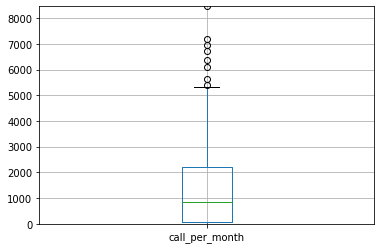

In [119]:
surf_plan.boxplot('call_per_month')
plt.ylim(0, 8451)

Q1 = surf_plan['call_per_month'].quantile(0.25)
Q3 = surf_plan['call_per_month'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('The upper limit:', Q3+1.5*IQR)

Here at the box plot there are outliers on surf plan call usage. in order to analyze better we will we will filter the column by removing the outliers.The upper limit one ends at about 5370.125, which is 1.5 IQR above the third quartile. That is the approximate border of the "typical" range. Everything beyond it can usually be considered an outlier.

In [120]:
#filter the surf plan data of the data by removing the outliers in the call usage column.

filtered_Call_surf =  surf_plan[surf_plan ['call_per_month'] < 5370.125]

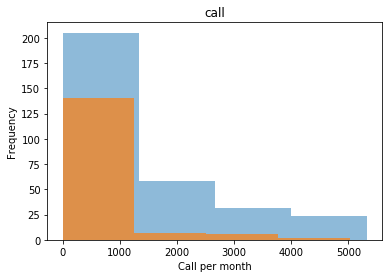

In [121]:
# making histogram of the filtered 'sms_usage ' column

filtered_Call_surf ['call_per_month'].plot.hist(bins=4, alpha=0.5);
ultimate_plan['call_per_month'].plot.hist(bins=4, alpha=0.7);
plt.title('call')
plt.xlabel('Call per month');

after removing the outliers we can now have a better view of the graph and on how the 2 data plan users differs in terms of call consumption.

<p><a name="internet"></a></p>

In [122]:
# determining the mean value of interenet data per user plan

surf_mean= surf_plan['Gb_per_month'].mean()
print('The mean volume of internet data for surf users:'"{:.5}". format(surf_mean))
ultimate_mean= ultimate_plan['Gb_per_month'].mean()
print('The mean volume of internet data for ultimate users:'"{:.5}". format(ultimate_mean))

The mean volume of internet data for surf users:58.383
The mean volume of internet data for ultimate users:47.703


In [123]:
# determining the standard deviation value of interenet data per user plan
surf_std= surf_plan['Gb_per_month'].std()
print('The standard deviation value of internet data volume for surf users:'"{:.5}". format(surf_std))
ultimate_std= ultimate_plan['Gb_per_month'].std()
print('The standard deviation value of internet data volume for ultimate users:'"{:.5}". format(ultimate_std))

The standard deviation value of internet data volume for surf users:58.255
The standard deviation value of internet data volume for ultimate users:61.719


In [124]:
# determining the dispersion value of interenet data per user plan using variance
surf_var= np.var(surf_plan['Gb_per_month'])
print('The derspersion value of internet data volume for surf users:'"{:.5}". format(surf_var))
ultimate_var= np.var(ultimate_plan['Gb_per_month'])
print('The despersion value of internet data volume for ultimate users:'"{:.5}". format(ultimate_var))

The derspersion value of internet data volume for surf users:3383.3
The despersion value of internet data volume for ultimate users:3784.7


S_max:  290.0
S_min: 0.0
U_max:  351.0
U_min: 0.0


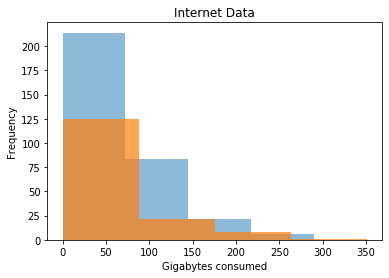

In [125]:
surf_plan['Gb_per_month'].plot.hist(bins=4, alpha=0.5);
print("S_max: ", surf_plan['Gb_per_month'].max())
print("S_min:", surf_plan['Gb_per_month'].min())
ultimate_plan['Gb_per_month'].plot.hist(bins=4, alpha=0.7);
print("U_max: ", ultimate_plan['Gb_per_month'].max())
print("U_min:", ultimate_plan['Gb_per_month'].min())
plt.title('Internet Data');
plt.xlabel('Gigabytes consumed');

The lower limit: 7.25
The upper limit: 226.625


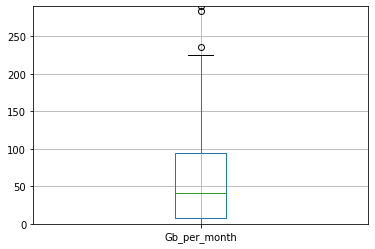

In [126]:
surf_plan.boxplot('Gb_per_month')
plt.ylim(0, 290)

Q1 = surf_plan['Gb_per_month'].quantile(0.25)
Q3 = surf_plan['Gb_per_month'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('The upper limit:', Q3+1.5*IQR)

in the column of surf_plan for internet usage we can outliers beyond 226.625 Gb consumption, this means we have to filter the data by removing the outliers.

In [127]:
#filter the surf plan data of the data by removing the outliers in the internet usage column.

filtered_intenet_surf =  surf_plan[surf_plan ['Gb_per_month'] < 226.625]

The lower limit: 0.0
The upper limit: 181.25


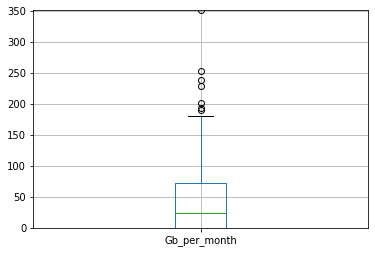

In [128]:
# ultimate_plan.boxplot('Gb_per_month')
ultimate_plan.boxplot('Gb_per_month')
plt.ylim(0, 351)

Q1 = ultimate_plan['Gb_per_month'].quantile(0.25)
Q3 = ultimate_plan['Gb_per_month'].quantile(0.75)
IQR = Q3 - Q1
print('The lower limit:', Q1)
print('The upper limit:', Q3+1.5*IQR)

In the case of internet consumption for ultimate plan user the upper limit is 181.25 and therefore above that are considered outliers.

In [129]:
#filter the ultimate plan data of the data by removing the outliers in the internet usage column.

filtered_intenet_ultimate =  ultimate_plan[ultimate_plan ['Gb_per_month'] < 181.25]

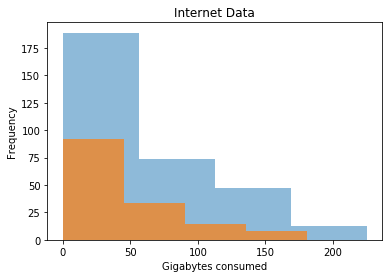

In [130]:
# plotting new hist for both plan to see how thex differ.
filtered_intenet_surf['Gb_per_month'].plot.hist(bins=4, alpha=0.5);
filtered_intenet_ultimate['Gb_per_month'].plot.hist(bins=4, alpha=0.7);
plt.title('Internet Data');
plt.xlabel('Gigabytes consumed');

Now that we have filtered the data from outliers we can have a better of of how the internet consumption of both plan differs. The surf user still has more internet consumtion than the ultimate users.

<p><a name="volumereq"></a></p>

In [131]:
#calculating the volume of sms data a surf plan and ultimate user need per month
surf_sms_req = filtered_surf['sms_per_month'].mean()
print('Every surf plan user require '"{:.5}". format(surf_sms_req), 'sms volume  every month.')
ultimate_sms_req = ultimate_plan['sms_per_month'].mean()
print('Every ultimate plan user require '"{:.5}". format(ultimate_sms_req), 'sms volume every month.')

Every surf plan user require 57.959 sms volume  every month.
Every ultimate plan user require 1.8581 sms volume every month.


In [132]:
#calculating the volume of call data a surf plan and ultimate user need per month
surf_call_req = filtered_Call_surf ['call_per_month'].mean()
print('Every surf plan user require '"{:.5}". format(surf_call_req), 'minutes call volume  every month.')
ultimate_call_req = ultimate_plan['call_per_month'].mean()
print('Every ultimate plan user require '"{:.5}". format(ultimate_call_req), 'minutes call volume every month.')

Every surf plan user require 1272.5 minutes call volume  every month.
Every ultimate plan user require 276.79 minutes call volume every month.


In [133]:
#calculating the volume of internet data a surf plan and ultimate user need per month
surf_user_req = filtered_intenet_surf['Gb_per_month'].mean()
print('Every surf plan user require '"{:.5}". format(surf_user_req), 'Gb of internet every month.')
ultimate_user_req = filtered_intenet_ultimate['Gb_per_month'].mean()
print('Every ultimate plan user require '"{:.5}". format(ultimate_user_req), 'Gb of internet every month.')

Every surf plan user require 56.418 Gb of internet every month.
Every ultimate plan user require 38.764 Gb of internet every month.


After filtering the columns from outliers, we calculate again the mean so that we will be able to determine the average monthly requirement of internet usage of users in every plan.

<p><a name="Step3conclusion"></a></p>

### Conclusion

For internet Data consumption, just like the text and call, the users who use surf plan consumes more data more often beyond the plan inclusion which makes them pay more than the users of ultimate plan. After analyzing the data we found out that the users of surf plan has higher sms, call and data volume monthly requirement compared to the ultimate users. 

<p><a name="Step 4"></a></p>

### Step 4. Test the hypotheses

In [134]:
#in order to test gthe hypothesis i will slice the data set according to the plan of user.
call_profit_surf = surf_plan['call_charge'].sum()
call_profit_ultimate = ultimate_plan ['call_charge'].sum()
call_profit_diff = call_profit_surf - call_profit_ultimate
print(call_profit_diff)

13294.98


In [135]:
call_profit_sum = call_profit_surf + call_profit_ultimate
call_profit =  call_profit_diff / call_profit_sum 
print(call_profit)

0.939372742534466


In [136]:
print('The average profit from users of Ultimate and Surf calling plans differs:', "{:.5%}".format(call_profit))

The average profit from users of Ultimate and Surf calling plans differs: 93.93727%


The average profit of call charges of surf plan differs very high since the users from surf plan has shorter minutes inclusion but they use more minutes and the charge of per minute in surf plan is .03 cents while in ultimate is only 0.01 cent per minute.

### Hypotheses 


### Hypotheses 1
In this problem, the null hypothesis is the  average revenue from users of Ultimate and Surf calling plans does not differ, this means thats if the result of the calculation is less the 5% then we accept the null hypothesis.

And the alternative hypothesis is the average revenue from users of Ultimate and Surf calling plans differs when the result is more that 5%.

In [137]:
# Testing the hyphothesis of users in surf and ultimate plan
results = st.stats.ttest_ind(surf_plan['call_charge'], ultimate_plan ['call_charge'], equal_var= False)


In [138]:
alpha = .05

For a significance level of 0.05, expect to obtain sample means in the critical region 5% of the time when the null hypothesis is true. We set the alpha to 0.05 first because it a typical practice in behavioral research.

In [139]:
print('p-value:', results.pvalue / 2)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 4.389108687471907e-38
We reject the null hypothesis


In [140]:
# extracting the NY-NJ city from the column and making new list
NYNJ_city = users_data_final[(users_data_final['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')] 

In [141]:
# subracting NY-NJ area from the column and grouping them together.

other_city = users_data_final[~(users_data_final['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')]

In [142]:
NYNJ_city_rev = NYNJ_city['revenue']
other_city_rev = other_city ['revenue']

### Hypotheses 2
The null hypothesis H₀, is the average revenue from users in NY-NJ area is not different from that of the users from other regions.

And The alternative hypothesis, H₁, is the The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [143]:
print('mean before: '"{:.5}". format(NYNJ_city['revenue'].mean()))
print('mean after: '"{:.5}". format(other_city['revenue'].mean()))

mean before: 571.2
mean after: 527.81


In [144]:
# Testing the hyphothesis that NY-NJ area has 571.2 average revenue per month

optimal_value = 571.2

In [145]:
alpha = 0.05

In [146]:
results = st.ttest_1samp(NYNJ_city_rev, optimal_value)

In [147]:
print('p-value:', results.pvalue )
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.9999790453723953
We can't reject the null hypothesis


the p-value is bigger than the alpha meaning the null hyphothesis is correct that the average revenue of NY-NJ users is 571.2.

In [148]:
#Testing the hyphothesis that other cities revenue differs from NY-NJ users.
optimal_value =527.81
alpha = 0.05

In [149]:
results = st.ttest_1samp(other_city_rev, optimal_value)

In [150]:
print('p-value:', results.pvalue )
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.9998832664158952
We can't reject the null hypothesis


The p-value is higher than the alpha meaning our null hyphothesis is right that the average revenue from the other cities is 527.81.

### Conclusion

Our hyphothesis suggest that behavior of users from surf and ultimate plan differ as our mathematical calculations  on the data would also back it up.The second hyphothesis also tells us that the average revenue of the user fron NY-NJ area differs and they are higher compared to the users from the other city.

<p><a name="Step 5"></a></p>

### Step 5. Write an overall conclusion

I therefore conclude that the surf Plan generates more revenue to the company, the data shows the behavior of the users for different plan. In the case of surf plan users which is more affordable than the ultimate plan but the volume inclusion is low which do not equate to the high requirement of the users in effect the users tend to pay more than the plan amount. In the case of ultimate plan users, they tend to limit thier consumption only within the limit of thier plan.In terms of earnings the Data subbscription charges earns the most compared to sms and call charges for both plan. The bigger promotion given to the surp plan the bigger revenue it will bring to the company.
